In [33]:
import pandas as pd
import numpy as np
import math

In [34]:
data=pd.read_csv('PlayTennis.csv')
data

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [35]:
def entropy(att1): #Functiion to calculate entropy
    sum1=0
    for i in range(len(att1)):
        pi=list(att1.values())[i]/sum(att1.values())
        sum1+=-pi*math.log2(pi)
    return sum1

In [36]:

def classes(att1): # Entropy for all the columns
    l1=list(dict(data[att1].value_counts()).keys())
    entvalues=dict()
    for i in l1:
        entvalues.update({i:entropy(dict(data[data[att1]==i]['Play Tennis'].value_counts()))})
    return entvalues

In [37]:
def gain(S,att1):  #Information gain
    count=dict(data[att1].value_counts())
    entval=classes(att1)
    if entval.keys()==count.keys():
        value=list(entval.values())
        c=list(count.values())
        sum1=0
        for i in range(len(value)):
            sum1+=(c[i]/sum(c))*value[i]
        return (S-sum1)

In [38]:

def root(S,col): # Decides the root node
    result={}
    for i in col:
        result.update({i:gain(S,i)})
    return result

In [39]:

S=entropy(dict(data['Play Tennis'].value_counts()))

In [40]:
res=max(root(S,list(data.columns)[:-1]),key=root(S,list(data.columns)[:-1]).get)

In [41]:
res

'Outlook'

In [42]:
f={0:res}

In [43]:
def split(att1,l1,i): # Splits the attribute
    count=dict(att1['Play Tennis'].value_counts())
    if len(count)>1:
        S=entropy(count)
        if len(l1)==len(list(data.columns)):
            left=l1
        else:
            left=list(data.columns.delete(data.columns.get_indexer_for(l1)))
        out=max(root(S,left),key=root(S,left).get)
    else:
        out=list(count.keys())[0]
    return out

In [44]:
def tree(attr,l1): # Tree
    l2=l1
    level={}
    for (i,j) in attr.items():
            if j != "Yes" and j!="No":
                if len(attr)<2:
                    j=res
                elif len(attr)>2:
                    j=j
                for k in list(dict(data[j].value_counts()).keys()):
                    if len(attr)<2:
                        second=data[data[j]==k]
                    else:
                        for z in range(len(l2)):
                            if i[0] in data[l2[z]].unique() or i[1] in data[l2[z]].unique():
                                second=data[((data[l2[z]]==i[0]) | (data[l2[z]]==i[1])) & (data[j]==k)]
                    l1.append(j)
                    l1=list(np.unique(l1))
                    result=split(second,l1,k)
                    if len(attr)<2:
                        level.update({(j,k):result})
                    else:
                        level.update({(i[1],k):result})
    return level,l1

In [45]:

m2={}
def store(attr,node): # recusrive function throughout the data
    if attr=={}:
        return m2,node
    else:
        for (i,j) in attr.items():
            if (j == "Yes" or j=="No"):
                m2.update({i:j})
        attr,l=tree(attr,node)
        return store(attr,l)

In [46]:

attr1,lm=store(f,['Play Tennis'])
print(lm,attr1)

['Humidity', 'Outlook', 'Play Tennis', 'Wind'] {('Outlook', 'Overcast'): 'Yes', ('Sunny', 'High'): 'No', ('Sunny', 'Normal'): 'Yes', ('High', 'Weak'): 'Yes', ('High', 'Strong'): 'No', ('Normal', 'Weak'): 'Yes', ('Normal', 'Strong'): 'No'}


In [47]:
def test1(attr,test):
    test.pop(int(data.columns.get_indexer([lm[0]])))
    if list(attr.keys())[0][1] == test[0]:
        return (list(attr.values())[0])
    else:
        for (i,j) in attr.items():
            for k in range(len(test)):
                if ((test[k],test[k-1]) ==i or (test[k-1],test[k])) ==i:
                    return j

In [48]:
test=['Overcast','Cool''Normal','Strong']
print(test1(attr1,test))

Yes


In [49]:
test=['Sunny','Mild','High','Weak']
print(test1(attr1,test))

None


In [50]:
test=['Rain','Mild','High','Strong']
print(test1(attr1,test))

None


In [51]:
test=['Overcast','Mild','High','Strong']
print(test1(attr1,test))

Yes


In [61]:


test=['Rain','Mild','Normal','Strong']
print(test1(attr1,test))

None


In [52]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import graphviz 

In [53]:
PlayTennis = pd.read_csv('PlayTennis.csv')

In [54]:
PlayTennis

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [55]:
Le = LabelEncoder()

PlayTennis['Outlook'] = Le.fit_transform(PlayTennis['Outlook'])
PlayTennis['Temperature'] = Le.fit_transform(PlayTennis['Temperature'])
PlayTennis['Humidity'] = Le.fit_transform(PlayTennis['Humidity'])
PlayTennis['Wind'] = Le.fit_transform(PlayTennis['Wind'])
PlayTennis['Play Tennis'] = Le.fit_transform(PlayTennis['Play Tennis'])

In [56]:
PlayTennis

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


In [57]:
y = PlayTennis['Play Tennis']
X = PlayTennis.drop(['Play Tennis'],axis=1)

In [58]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
clf = clf.fit(X, y)

[Text(148.8, 195.696, 'X[0] <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]'),
 Text(111.60000000000001, 152.208, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(186.0, 152.208, 'X[2] <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]'),
 Text(111.60000000000001, 108.72, 'X[0] <= 1.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(74.4, 65.232, 'X[3] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(37.2, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(111.60000000000001, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(148.8, 65.232, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(260.40000000000003, 108.72, 'X[3] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(223.20000000000002, 65.232, 'X[0] <= 1.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(186.0, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(260.40000000000003, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(297.6, 65.232,

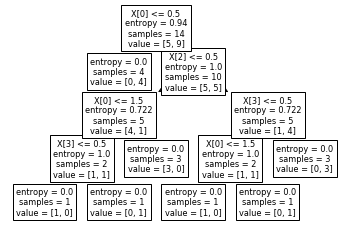

In [59]:
tree.plot_tree(clf)

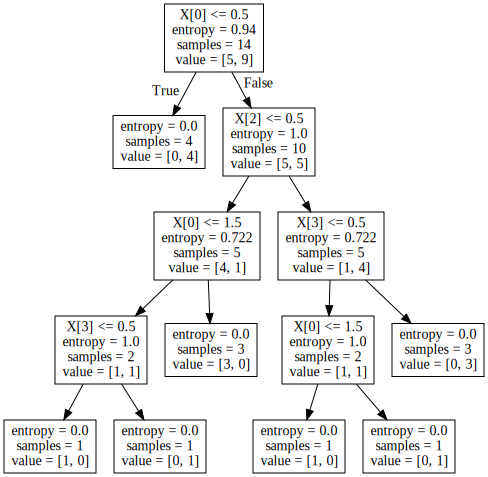

In [60]:

dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

#In the below graph
#X[0] -> Outlook
#X[1] -> Temperature
#X[2] -> Humidity
#X[3] -> Wind